In [ ]:
from scipy.optimize import linprog
import sympy
from sympy import symbols, diff
import numpy as np
import pandas as pd
from scipy.linalg import solve
from copy import deepcopy
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

При запуске функции необходимо будет выбрать метод решения задачи:

1.методом Ньютона 

2.методом логарифмических барьеров 

3.методом внутренней точки

In [ ]:
def Solve():
  print('''Корректный ввод данных:
  Переменные вводить через пробел: x y z 
  Функция необходимо вводить без пробелов и без * , единичный коэффициент указывается: 1х+2y-3z
  Ограничения вводятся со всеми переменными, включая нулевые: 1x+4y-0z=100
  Неравенства задовать только  меньше или равно: 1x+4y-0z<=100
  ''')
 
  var = input('Введите переменные через пробел: ').split()
  func = input('Введите функцию: ')
  count_limit = int(input('Введите количество ограничивающих уравнений: '))
  limit, coef_lim, c, lhs_ineq, rhs_ineq = [], [], [], [], []

  #функция выделения коэффициентов 
  def Coef_recognition(func, var):
    Сoef = {}
    for i in range(len(var)):
      Сoef[var[i]] = float(re.findall(f'-?[0-9.]*[{var[i]}]', func)[0][:-1])
    return Сoef, re.sub(f"[+-]?\d+[a-zA-Z]|[+-]?\d+\.\d+[a-zA-Z]","", func)  

  for i in range(count_limit):
      limit.append(input('Введите ограничение: '))
      
  method = input('Введите метод: ')
  method_linprog = {'1': 'simplex','2': 'interior-point','3': 'revised simplex'}
  coef_func = Coef_recognition(func, var)

  for i in range(len(limit)):
      coef_lim.append(Coef_recognition(limit[i], var))

  c = []
  for i in var:
      c.append(float(coef_func[0][i]))
  if coef_func[1]:
      c.append(float(coef_func[1]))

  for i in range(len(limit)):
      lhs_ineq.append(list(coef_lim[i][0].values()))
      rhs_ineq.append(float(coef_lim[i][1][2:]))

  extreme = linprog(c=c, A_ub=lhs_ineq, b_ub=rhs_ineq, method=method_linprog[method])

  if len(var)==2:
    X = coef_func[0]
    X, Y = X.values()
    x = np.linspace (extreme.x[0]-10,extreme.x[0]+ 10, 100)
    y = np.linspace (extreme.x[1]-10,extreme.x[1]+ 10, 100)
    xgrid, ygrid = np.meshgrid(x, y)
    z = xgrid * X + Y * ygrid
    fig = plt.figure(figsize=(16,9))
    axes = fig.add_subplot(projection='3d')
    axes.plot_surface(x, y, z)
    plt.show()
    axes.scatter(X, Y, extreme.fun, color='orange', s=1000, marker='o')

  print(f'\nКоординаты точки экстремума: {extreme.x} \nЗначение функции: {extreme.fun}') 

Примеры работы:

1.методом Ньютона 

In [ ]:
Solve()

Корректный ввод данных:
  Переменные вводить через пробел: x y z 
  Функция необходимо вводить без пробелов и без * , единичный коэффициент указывается: 1х+2y-3z
  Ограничения вводятся со всеми переменными, включая нулевые: 1x+4y-0z=100
  Неравенства задовать только  меньше или равно: 1x+4y-0z<=100
  
Введите переменные через пробел: x y z
Введите функцию: 1x+2y-3z
Введите количество ограничивающих уравнений: 3
Введите ограничение: -1x-0y-0z=-100
Введите ограничение: 4x-5y+6z=100
Введите ограничение: -7x+8y-9z=-100
Введите метод: 1

Координаты точки экстремума: [  0.         200.         166.66666667] 
Значение функции: -100.0


2.методом логарифмических барьеров 

In [ ]:
Solve()

Корректный ввод данных:
  Переменные вводить через пробел: x y z 
  Функция необходимо вводить без пробелов и без * , единичный коэффициент указывается: 1х+2y-3z
  Ограничения вводятся со всеми переменными, включая нулевые: 1x+4y-0z=100
  Неравенства задовать только  меньше или равно: 1x+4y-0z<=100
  
Введите переменные через пробел: x y z
Введите функцию: 1x+2y-3z
Введите количество ограничивающих уравнений: 3
Введите ограничение: -1x-0y-0z<=-100
Введите ограничение: 4x-5y+6z<=100
Введите ограничение: -7x+8y-9z<=-100
Введите метод: 2

Координаты точки экстремума: [100.00000117 299.99999926 199.99999906] 
Значение функции: 100.00000251549955


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


3.методом внутренней точки

In [ ]:
Solve()

Корректный ввод данных:
  Переменные вводить через пробел: x y z 
  Функция необходимо вводить без пробелов и без * , единичный коэффициент указывается: 1х+2y-3z
  Ограничения вводятся со всеми переменными, включая нулевые: 1x+4y-0z=100
  Неравенства задовать только  меньше или равно: 1x+4y-0z<=100
  
Введите переменные через пробел: x y z
Введите функцию: 1x+2y-3z
Введите количество ограничивающих уравнений: 3
Введите ограничение: 4x-5y+6z<=100
Введите ограничение: -1x-0y-0z<=-100
Введите ограничение: -7x+8y-9z<=-100
Введите метод: 3

Координаты точки экстремума: [100. 300. 200.] 
Значение функции: 99.99999999999989


In [ ]:
Solve()

Корректный ввод данных:
  Переменные вводить через пробел: x y z 
  Функция необходимо вводить без пробелов и без * , единичный коэффициент указывается: 1х+2y-3z
  Ограничения вводятся со всеми переменными, включая нулевые: 1x+4y-0z=100
  Неравенства задовать только  меньше или равно: 1x+4y-0z<=100
  
Введите переменные через пробел: x y 
Введите функцию: 1x-4y
Введите количество ограничивающих уравнений: 1
Введите ограничение: 1x-8y=9
Введите метод: 1


ValueError: ignored

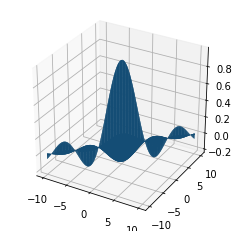

In [ ]:
x = np.linspace (-10, 10, 100)
y = np.linspace (-10, 10, 100)
xgrid, ygrid = np.meshgrid(x, y)
z = np.sin (xgrid) * np.sin (ygrid) / (xgrid * ygrid)
fig = plt.figure(figsize=(4,4))
axes = fig.add_subplot(projection='3d')
axes.plot_surface(x, y, z)
plt.show()

In [ ]:
Solve()

Корректный ввод данных:
  Переменные вводить через пробел: x y z 
  Функция необходимо вводить без пробелов и без * , единичный коэффициент указывается: 1х+2y-3z
  Ограничения вводятся со всеми переменными, включая нулевые: 1x+4y-0z=100
  Неравенства задовать только  меньше или равно: 1x+4y-0z<=100
  
Введите переменные через пробел: x y
Введите функцию: 6x-3y
Введите количество ограничивающих уравнений: 2
Введите ограничение: 1x+5y=100
Введите ограничение: 1x-6y=10
Введите метод: 1
<class 'tuple'>
{'x': 6.0, 'y': -3.0}

Координаты точки экстремума: [0. 0.] 
Значение функции: 0.0


Корректный ввод данных:
  Переменные вводить через пробел: x y z 
  Функция необходимо вводить без пробелов и без * , единичный коэффициент указывается: 1х+2y-3z
  Ограничения вводятся со всеми переменными, включая нулевые: 1x+4y-0z=100
  Неравенства задовать только  меньше или равно: 1x+4y-0z<=100
  
Введите переменные через пробел: x y
Введите функцию: 6x-3y
Введите количество ограничивающих уравнений: 2
Введите ограничение: 1x+5y=100
Введите ограничение: 1x-6y=10
Введите метод: 1


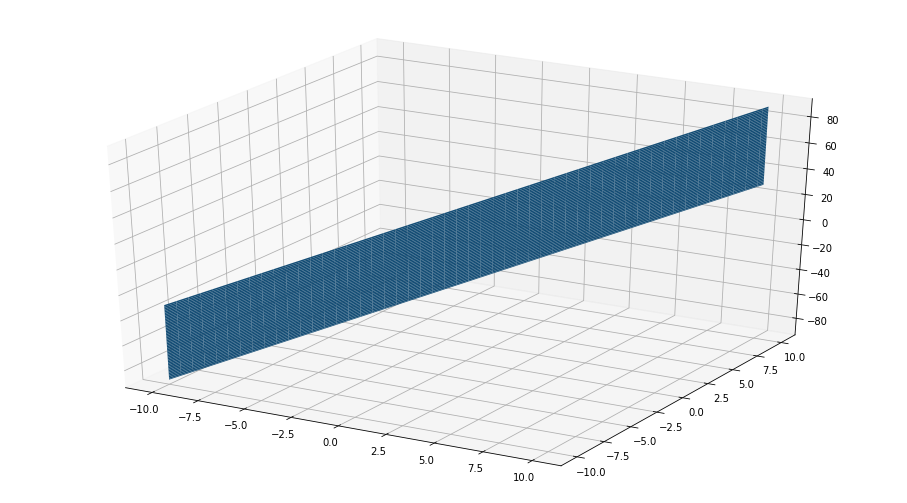


Координаты точки экстремума: [0. 0.] 
Значение функции: 0.0


In [ ]:
Solve()

In [ ]:
a =(1,2,3)
a[1]

2